## __Capstone Project: Income Prediction__ 💰

Income inequality, where income is distributed unevenly among a population, is a growing problem across the world. With the rapid rise of migration, artificial intelligence (AI) and worker automation, this problem could continue to grow if steps are not taken to address the issue.

The project follows the CRISP-DM methodology as follows:
- Business Understanding 
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment

## __Business Understanding__ 

#### **Business Objectives**
- The project focuses on leveraging machine learning to predict whether individuals in developing nations earn above or below a specific income threshold, aiming to address the pressing issue of income inequality mostly witnessed in developing nations. 
- By creating a cost-effective and accurate tool for monitoring income levels between census years, this initiative not only offers valuable insights for policymakers to manage income disparities effectively but also carries the potential to significantly contribute to global efforts in mitigating income inequality and fostering a more equitable society.

**Business Needs:** A model to accurately predict if an individual earns above 50,000 USD.

#### **Project Goals**
- To create a machine learning model to predict if an individual earns above 50,000 USD.
- To create a streamlit app for user interaction

#### **Hypothesis**
Null Hypothesis (H0): There is no significant relationship between industry type and income level above 50,000 USD.

Alternative Hypothesis (H1): There is a significant relationship between industry type and income level above 50,000 USD.

#### **Analytical Questions**
**TO BE FILLED IN BY PERSON TACKLING ANALYTICAL QUESTION**

#### **Timeline** 
**Week One:**
- Data Collection & Cleaning
- Exploratory Data Analysis
- Feature Engineering
- Model Building & Evaluation

**Week Two:**
- Model Tuning & Optimization
- Final Model Evaluation
- App Deployment
- Documentation & Reporting

The dataset has 43 columns and 209499 rows.The features for the training dataset are as follows:
- **ID**: Unique identifier for each individual.
- **age**: Age of the individual.
- **gender**: Gender of the individual.
- **education**: Level of education of the individual.
- **class**: Social class of the individual.
- **education_institute**: Type of educational institution attended.
- **marital_status**: Marital status of the individual.
- **race**: Race of the individual.
- **is_hispanic**: Indicator for Hispanic ethnicity.
- **employment_commitment**: Level of commitment to employment.
- **unemployment_reason**: Reason for unemployment.
- **employment_stat**: Employment status of the individual.
- **wage_per_hour**: Hourly wage of the individual.
- **is_labor_union**: Membership in a labor union.
- **working_week_per_year**: Number of weeks worked per year.
- **industry_code**: Code representing the industry of employment.
- **industry_code_main**: Main industry code.
- **occupation_code**: Code representing the occupation.
- **occupation_code_main**: Main occupation code.
- **total_employed**: Total number of individuals employed.
- **household_stat**: Household status.
- **household_summary**: Summary of household information.
- **under_18_family**: Presence of individuals under 18 in the family.
- **veterans_admin_questionnaire**: Veteran status questionnaire.
- **vet_benefit**: Veteran benefits received.
- **tax_status**: Tax status of the individual.
- **gains**: Financial gains.
- **losses**: Financial losses.
- **stocks_status**: Status of stocks owned.
- **citizenship**: Citizenship status.
- **mig_year**: Year of migration.
- **country_of_birth_own**: Country of birth of the individual.
- **country_of_birth_father**: Country of birth of the individual's father.
- **country_of_birth_mother**: Country of birth of the individual's mother.
- **migration_code_change_in_msa**: Code for change in MSA migration.
- **migration_prev_sunbelt**: Previous migration status in the Sunbelt.
- **migration_code_move_within_reg**: Code for moving within a region.
- **migration_code_change_in_reg**: Code for change in region migration.
- **residence_1_year_ago**: Previous residence status.
- **old_residence_reg**: Previous residence region.
- **old_residence_state**: Previous residence state.
- **importance_of_record**: Importance of the record.
- **income_above_limit**: Indicator for income above a certain limit.

## __Data Understanding__

Load Necessary Packages

In [ ]:
## IMPORT LIBRARIES

import pandas as pd
import numpy as np
import os
import joblib
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Data modelling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn import metrics
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
from sklearn.metrics import *
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold,KFold

Load Data

In [ ]:
# Load all datasets
# Load train data
train_data = pd.read_csv('./datafiles/income trainset.csv')

train_data.head()

In [ ]:
# Load testing data
test_data = pd.read_csv('./datafiles/income testset.csv')
test_data.head()

### **Exploratory Data Analysis (EDA)**

Train Data

In [ ]:
# Check columns
train_data.columns

In [ ]:
# Check general information
train_data.info()

In [ ]:
# Check statistical description of numerical columns
train_data.describe().T

In [ ]:
# Check for Duplicates
train_data.duplicated().sum()

In [ ]:
# Check for null values
train_data.isna().sum()

Test Data

In [ ]:
# Check columns
test_data.columns

In [ ]:
# Check general info
test_data.info()

In [ ]:
# Check statistical information of numerical columns
test_data.describe().T

In [ ]:
# Check for nulls
test_data.isna().sum()

In [ ]:
# Check for duplicates
test_data.duplicated().sum()

#### **Key Insights**
1. There are many missing values in columns both datasets
2. There are no duplicates
3. Data has different scales
4. Irrelevant columns should be dropped in both datasets
5. Other columns should be filled


### **Univariate Analysis**

In [ ]:
# Visualize distribution of target column 'income_above_limit'

plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='income_above_limit', color='purple')
plt.title('Distribution of Incomes Above Limit in Training Data')
plt.xlabel('Income Above Limit')
plt.ylabel('Count')
plt.show()


In [ ]:
# Select numerical columns
numerical_cols = train_data.select_dtypes(include='number').columns

# Select categorical columns
categorical_cols = train_data.select_dtypes(include='object').columns

Visualizing Numerical Columns

In [ ]:
# Visualize the distribution of each numerica; column using a histogram
# Create a figure with subplots
plt.figure(figsize=(20, 20))

# Loop through each column and create a histogram
for i, column in enumerate(numerical_cols, start=1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns, ith subplot
    sns.histplot(data=train_data, x=column, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Check for Outliers in Numerical Columns

In [ ]:
# Visualize the distribution of each categorical column using a histogram
# Create a figure with subplots
# Use boxplot to see outliers
plt.figure(figsize=(20, 20))

# Loop through each column and create a histogram
for i, column in enumerate(numerical_cols, start=1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns, ith subplot
    sns.boxplot(data=train_data, x=column, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Visualizing Categorical Colummns

In [ ]:
# Visualize the distribution of each categorical column
# Create a figure with subplots
plt.figure(figsize=(35, 35))

# Loop through each column and create a violin plot
for i, column in enumerate(categorical_cols, start=1):
    plt.subplot(5, 4, i)  # 5 rows, 4 columns, ith subplot
    sns.histplot(data=train_data, x=column, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout(pad=3.0)
plt.show()


Check for outliers in Categorical Columns

In [ ]:
# Visualize the distribution of each categorical column
# Create a figure with subplots
plt.figure(figsize=(35, 35))

# Loop through each column and create a violin plot
for i, column in enumerate(categorical_cols, start=1):
    plt.subplot(5, 4, i)  # 5 rows, 4 columns, ith subplot
    sns.boxplot(data=train_data, x=column, color='purple')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout(pad=3.0)
plt.show()


### **Bivariate Analysis**

In [ ]:
# Compare income_above_limit distribution with each of the numerical columns
# use violinplot

# Create subplots for each numeric column
plt.figure(figsize=(18, 12))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.violinplot(x='income_above_limit', y=column, data=train_data, palette='rocket')
    plt.title(f'Comparison of {column} by Income Level Limit')
    plt.xlabel('Income Level')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [ ]:
# Compare income_above_limit distribution with each of the numerical columns
# use boxplot to see outliers

# Create subplots for each numeric column
plt.figure(figsize=(18, 12))

for i, column in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='income_above_limit', y=column, data=train_data, palette='rocket')
    plt.title(f'Comparison of {column} by Income Level Limit')
    plt.xlabel('Income Level')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [ ]:
# Compare sepsis distribution with each of the categorical columns
# Use violinplot

# Create subplots for each numeric column
plt.figure(figsize=(35, 35))

for i, column in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.violinplot(x='income_above_limit', y=column, data=train_data, palette='rocket')
    plt.title(f'Comparison of {column} by Income Level')
    plt.xlabel('Income Level')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


### **Multivariate Analysis**

In [ ]:
# Pairplot for multivariate relationships between selected numeric columns
sns.pairplot(train_data, hue='income_above_limit', palette='rocket', diag_kind='kde')

plt.suptitle('Pairplot of Numerical Features Colored by Income Level', y=1.02)
plt.show()


In [ ]:
# Calculate the correlation matrix for numeric columns
corr_matrix = train_data[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Heatmap of Correlations Among Numerical Features')
plt.show()

### **Analytical Questions**

### **1. Does race influence the income limits a person can achieve?**


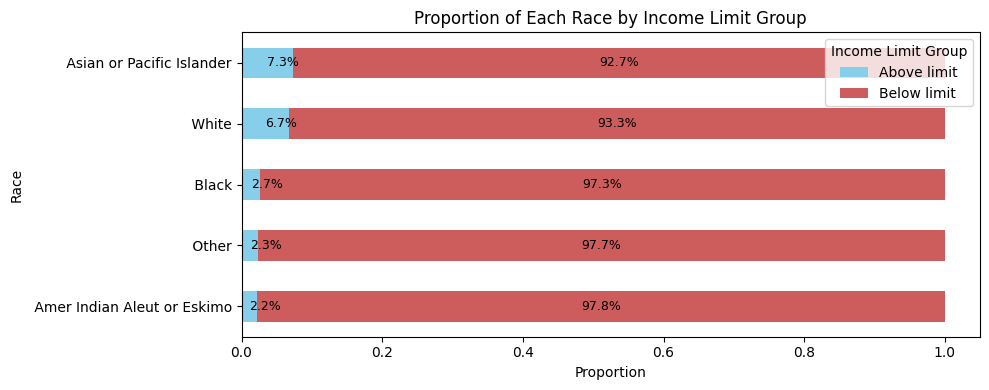

In [25]:
# Calculate proportions for each category in citizenship
df_prop_race = train_data.groupby('race')['income_above_limit'].value_counts(normalize=True).unstack()

# Sort by 'Above limit'
df_prop_sorted = df_prop_race.sort_values(by='Above limit', ascending=True)

# Plot
ax = df_prop_sorted.plot(kind='barh', stacked=True, color=['skyblue', 'indianred'], figsize=(10, 4))

# Add data labels
for i, (below, above) in enumerate(df_prop_sorted.values):
    ax.text(below / 2, i, f'{below:.1%}', ha='left', va='center', color='black', fontsize=9)
    ax.text(below + above / 2, i, f'{above:.1%}', ha='center', va='center', color='black', fontsize=9)

# Labels and title
ax.set_xlabel('Proportion')
ax.set_ylabel('Race')
ax.set_title('Proportion of Each Race by Income Limit Group')
ax.legend(['Above limit', 'Below limit'], title='Income Limit Group')
plt.tight_layout()
plt.show()


### **Notes**
- Race and Income Limit:  
Race does not have a significant impact on the income limit a person earns.  
Proportions of 'Above Limit':  
Asian or Pacific Islanders: Highest proportion at 0.073  
Whites: Second highest proportion at 0.0674  
Blacks: Proportion of 0.0268  
Others: Proportion of 0.0234  
American Indian Aleut Eskimos: Lowest proportion at 0.0215

### **2. Does Age Affect the Income Limits Achievable by an Individual?**


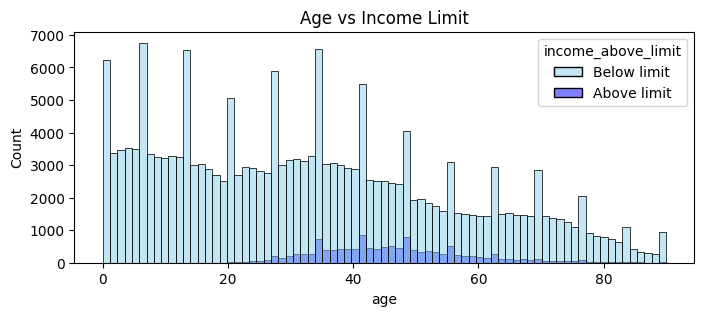

In [26]:
# Comparison of totals cases per PR reading against number of postive cases
# Create the histoplot
plt.figure(figsize=(8,3))
sns.histplot(hue='income_above_limit', x='age', data=train_data, fill=True, palette=['skyblue', 'blue'])
plt.title('Age vs Income Limit')
plt.show()

### **Notes:**
- The impact of age on income limits is not strongly pronounced.
- While most individuals earn below the limit, those between approximately 25 and 65 years old are more likely to earn above the limit.

### **3. How Does Gender Impact Income Levels?**


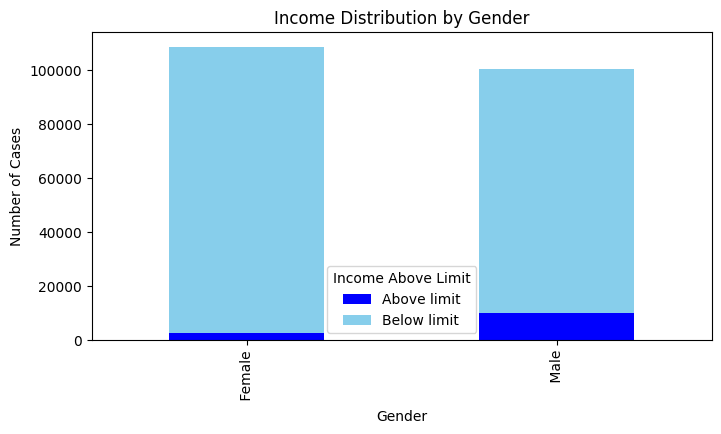

In [27]:
# Calculate the counts of each category
income_gender_counts = train_data.groupby(['gender', 'income_above_limit']).size().unstack()

# Plot stacked bar plot
income_gender_counts.plot(kind='bar', stacked=True, color=['blue', 'skyblue'], figsize=(8, 4))

# Add title and labels
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.legend(title='Income Above Limit')

# Show the plot
plt.show()

### **Notes:**
- Gender does not significantly impact income levels.
- Interestingly, even though there are fewer males, they are more more males earning above the income limit compared to their female counterparts.

### **4. Is There a Relationship Between Citizenship and Income Limits?**


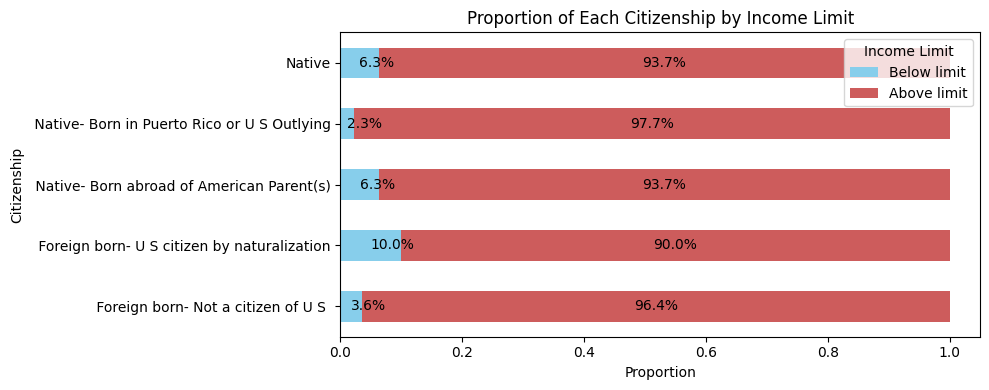

In [28]:
# Calculate proportions for each category in citizenship
df_prop = train_data.groupby('citizenship')['income_above_limit'].value_counts(normalize=True).unstack()

# Plot stacked bar chart 
ax = df_prop.plot(kind='barh', stacked=True, color=['skyblue', 'indianred'], figsize=(10, 4))

# Add data labels for 'Below limit' and 'Above limit'
for i, (below, above) in enumerate(df_prop.values):
    # Position for 'Below limit'
    ax.text(below / 2, i, f'{below:.1%}', ha='left', va='center', color='black', fontsize=10)
    # Position for 'Above limit'
    ax.text(below + above / 2, i, f'{above:.1%}', ha='center', va='center', color='black', fontsize=10)

# Add labels and title
ax.set_xlabel('Proportion')
ax.set_ylabel('Citizenship')
ax.set_title('Proportion of Each Citizenship by Income Limit')
ax.legend(['Below limit', 'Above limit'], title='Income Limit')
plt.tight_layout()
plt.show()

### **Notes:**
- Citizenship does not significantly impact income levels.
- Highest proportion of the people earn on the 'Below limit'
- US citizens by naturalarization have a higher 'Above limit' (10%) income compared to all other types of citizenship
- Natives born in Puerto Rico and other Outlying countries have the lowest 'Above limit' (2.3%) income compared to all other types of citizenship

### **5. How Are Income Limits Distributed Across Different Tax Status Categories?**

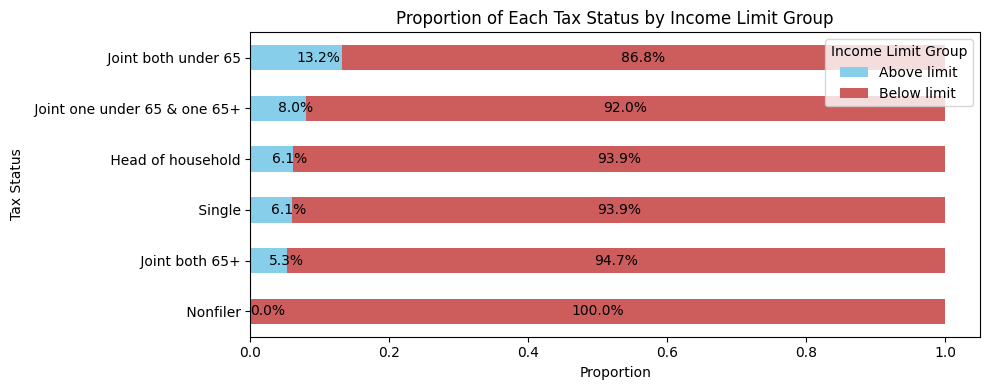

In [29]:
# Calculate proportions for each category in tax_status
df_prop = train_data.groupby('tax_status')['income_above_limit'].value_counts(normalize=True).unstack()

# Sort by 'Above limit'
df_prop_sorted = df_prop.sort_values(by='Above limit', ascending=True)

# Plot
ax = df_prop_sorted.plot(kind='barh', stacked=True, color=['skyblue', 'indianred'], figsize=(10, 4))

# Add data labels
for i, (below, above) in enumerate(df_prop_sorted.values):
    ax.text(below / 2, i, f'{below:.1%}', ha='left', va='center', color='black', fontsize=10)
    ax.text(below + above / 2, i, f'{above:.1%}', ha='center', va='center', color='black', fontsize=10)

# Labels and title
ax.set_xlabel('Proportion')
ax.set_ylabel('Tax Status')
ax.set_title('Proportion of Each Tax Status by Income Limit Group')
ax.legend(['Above limit', 'Below limit', ], title='Income Limit Group')
plt.tight_layout()
plt.show()

### **Notes:**
- Almost all non filers fall in the below limit category
- Joint both under 65 are the have the highest proportion of above limit category

### **Hypothesis Testing**

In [30]:
# Define the alpha level
alpha = 0.05

# Create a contingency table
contingency_table = pd.crosstab(train_data['income_above_limit'], train_data['education'])

# Perform Chi-Square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

# Interpretation
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between 'income_above_limit' and 'education'.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between 'income_above_limit' and 'education'.")

Chi-Square Statistic: 32023.581349682216
P-Value: 0.0
Reject the null hypothesis: There is a significant association between 'income_above_limit' and 'education'.


## Notes

### Chi-Square Test Results

The Chi-Square test was performed to assess the association between `income_above_limit` and `education`. The results are as follows:

- **Chi-Square Statistic**: `32023.58`  
  The Chi-Square statistic measures the deviation of the observed frequencies from the expected frequencies under the null hypothesis. A high Chi-Square value indicates a strong deviation, suggesting a significant association between the variables.

- **P-Value**: `0.0`  
  The p-value represents the probability of observing a Chi-Square statistic as extreme as, or more extreme than, the value obtained if the null hypothesis were true. A p-value of 0.0 (or very close to zero) indicates a highly significant result.

### Interpretation

Given the p-value is less than the standard alpha level of 0.05, we reject the null hypothesis. This means there is a statistically significant association between `income_above_limit` and `education`. In other words, the distribution of income levels is not independent of education levels; different educational backgrounds are associated with different income levels.


## __Data Preparation__

## __Modeling__

## __Hypeparameter Tuning__

## __Save the Models__

## __Test Data__